In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import preprocessing
import seaborn as sn
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import re

/Users/vincentlee/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('GFM_data.csv', sep = '\t')

### Clean dataframe and standardize numerical data

In [3]:
def helper(x):
    ## if string will make numeric
    if isinstance(x,str):
        x = x.replace(',','')
        ## if has ".1k" will change to numeric
        if '.' in x and 'K' in x:
            x = x.replace('.','')
            x = x.replace('K','00')
        ## if "k" will change to numeric
        if 'K' in x:
            x = x.replace('K','000')
        return x
    ## return nan
    else:
        return x
df['Number_of_Donations'] = df['Number_of_Donations'].apply(helper).astype(float)
df['FB_Shares'] = df['FB_Shares'].apply(helper).astype(float)
df['Number_of_Donors'] = df['Number_of_Donors'].apply(helper).astype(float)
df['Followers'] = df['Followers'].apply(helper).astype(float)

In [4]:
df['Amount_Raised'] = pd.Series(preprocessing.scale(df['Amount_Raised'].values))
df['Goal'] = pd.Series(preprocessing.scale(df['Goal'].values))
df['Number_of_Donations'] = pd.Series(preprocessing.scale(df['Number_of_Donations'].values))
df['FB_Shares'] = pd.Series(preprocessing.scale(df['FB_Shares'].values))
df['Number_of_Donors'] = pd.Series(preprocessing.scale(df['Number_of_Donors'].values))
df['Followers'] = pd.Series(preprocessing.scale(df['Followers'].values))

In [5]:
df = df.dropna()

In [6]:
df['Length_of_Fundraising']= df['Length_of_Fundraising'].apply(lambda x: int(x[:-24]))
df['Length_of_Fundraising'] = pd.Series(preprocessing.scale(df['Length_of_Fundraising'].values))

In [7]:
df.head()

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donations,Length_of_Fundraising,FB_Shares,Number_of_Donors,Followers,Text
0,0,https://www.gofundme.com/f/justiceforjacobblake,Medical,0,Justice for Jacob Blake,"Kenosha, WI",6.787767,9.412042,7.487609,-0.842096,10.818038,7.557339,7.755310,On August 23rd my son was shot multiple times ...
1,0,https://www.gofundme.com/f/official-navajo-nat...,Medical,0,Official Navajo Nation COVID-19 Relief Fund,"Window Rock, AZ",5.431987,2.797580,2.165875,1.417135,6.408449,2.140900,2.181245,\nThe Navajo Nation COVID-19 Fund has been est...
2,0,https://www.gofundme.com/f/help-a-front-line-n...,Medical,0,Help a front line nurse and baby get proper care,"Randolph, NJ",2.610111,3.459026,1.797042,1.618852,1.141705,1.755540,1.736621,"On Sunday, April 12, Sylvia Leroy, a pregnant ..."
3,0,https://www.gofundme.com/f/Tommy-Rivers-Rest-Up,Medical,1,"Rest up, Tommy, we'll see you soon","Scottsdale, AZ",1.734186,2.797580,0.985609,-0.075572,1.608379,0.899186,0.923285,"First, thank you for being here. Tommy Rivers ..."
4,0,https://www.gofundme.com/f/brandon039s-medical...,Medical,1,OFFICIAL BRANDON SAENZ MEDICAL FUND,"Tyler, TX",1.414907,1.970772,2.397713,0.811984,0.103595,2.397806,2.452357,My name is Melissa Green and I am the mother o...


In [8]:
count = 0
for x in df['Location']:
    if x.find('$') != -1:
        count += 1
count

0

## Quantitative Predictors

### The relationship between Amount_Raised and Number_of_Donations appears linear

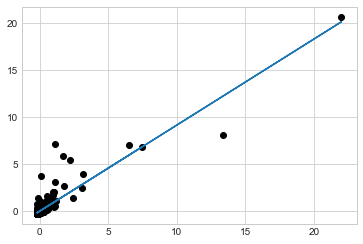

In [9]:
x = df['Number_of_Donations']
y = df['Amount_Raised']

plt.plot(x, y, 'o', color = 'black')

m, b = np.polyfit(x, y, 1)


plt.plot(x, m*x + b)

The p-value is very close to 0 so number of donations is a strong predictor of amount raised

In [10]:
X2 = sm.add_constant(x.values)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Amount_Raised   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     4215.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:34:30   Log-Likelihood:                -434.48
No. Observations:                 836   AIC:                             873.0
Df Residuals:                     834   BIC:                             882.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.014      0.009      0.9

In [11]:
mod = sm.OLS(y, x)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [12]:
p_values

Number_of_Donations    0.0
Name: P>|t|, dtype: float64

### The relationship between Amount_Raised and Goal appears linear

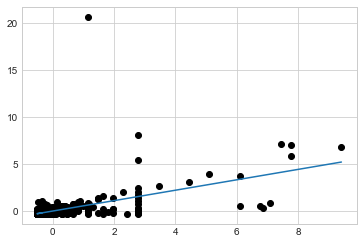

In [13]:
x = df['Goal']
y = df['Amount_Raised']

plt.plot(x, y, 'o', color = 'black')

m, b = np.polyfit(x, y, 1)


plt.plot(x, m*x + b)

The p-value is very close to 0 so Goal is a strong predictor of Amount_Raised

In [14]:
X2 = sm.add_constant(x.values)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Amount_Raised   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     367.3
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           4.07e-68
Time:                        00:34:30   Log-Likelihood:                -1034.6
No. Observations:                 836   AIC:                             2073.
Df Residuals:                     834   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.029      0.006      0.9

In [15]:
mod = sm.OLS(y, x)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [16]:
p_values

Goal    3.390507e-68
Name: P>|t|, dtype: float64

### The relationship between Amount_Raised and Followers appears linear

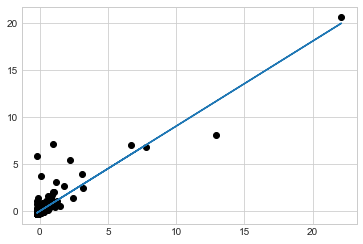

In [17]:
x = df['Followers']
y = df['Amount_Raised']

plt.plot(x, y, 'o', color = 'black')

m, b = np.polyfit(x, y, 1)


plt.plot(x, m*x + b)

The p-value is very close to 0 so Goal is a strong predictor of Amount_Raised

In [18]:
X2 = sm.add_constant(x.values)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Amount_Raised   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     3665.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          1.77e-307
Time:                        00:34:30   Log-Likelihood:                -482.65
No. Observations:                 836   AIC:                             969.3
Df Residuals:                     834   BIC:                             978.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.015      0.009      0.9

In [19]:
mod = sm.OLS(y, x)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [20]:
p_values

Followers    7.606328e-308
Name: P>|t|, dtype: float64

## Categorical Predictors

In [21]:
def boxplot_sorted(df, by, column):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values()
    df2[meds.index].boxplot(fontsize=14)

Text(0.5, 0.98, '')

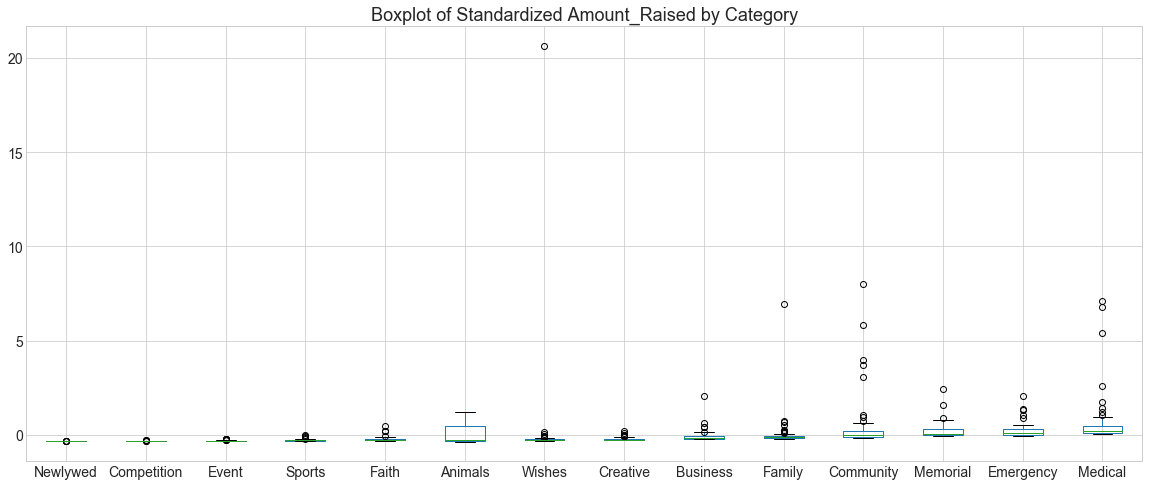

In [22]:
plt.figure(figsize=(20,8))
boxplot_sorted(df, by=["Category"], column="Amount_Raised")
plt.title("Boxplot of Standardized Amount_Raised by Category", fontsize=18)
plt.suptitle("")

Text(0.5, 0.98, '')

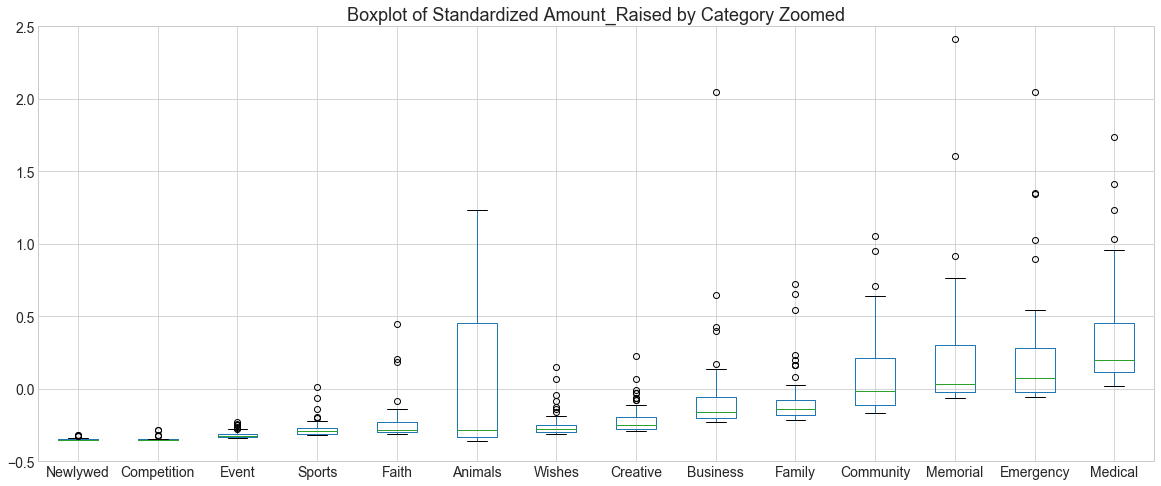

In [23]:
plt.figure(figsize=(20,8))
boxplot_sorted(df, by=["Category"], column="Amount_Raised")
plt.ylim(-0.5, 2.5)
plt.title("Boxplot of Standardized Amount_Raised by Category Zoomed", fontsize=18)
plt.suptitle("")

In [24]:
cat_subset = df[['Category', 'Amount_Raised']]
grps = pd.unique(cat_subset['Category'])
l_data = [cat_subset['Amount_Raised'][cat_subset['Category'] == grp] for grp in grps]
f, p = stats.f_oneway(*l_data)

In [25]:
f, p

(6.128265450927433, 4.9057089530166766e-11)

## Ridge Regression

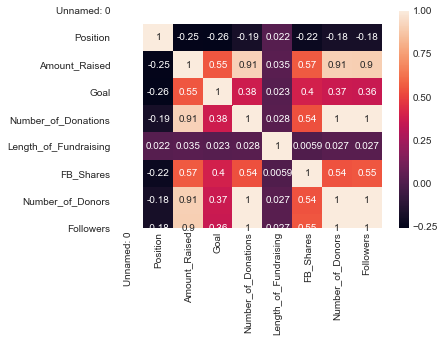

In [26]:
sn.heatmap(df.corr(), annot = True)
plt.show()

In [27]:
def to_integer(x):
    d = {'Business': 1, 'Community': 2, 'Competition': 3, 'Creative': 4, 'Education': 5, 'Emergency': 6, 'Event': 7, 'Faith': 8, 'Family':9, 'Medical': 10, 'Newlywed':11, 'Sports':12, 'Travel':13, 'Wishes': 14,'Memorial':15,'Animals':16}
    return d[x]

In [28]:
new_column = df.get('Category').apply(to_integer)
df = df.assign(Categorical_Assign = new_column)

In [29]:
reg_df = df[['Amount_Raised', 'Categorical_Assign', 'Goal', 'Number_of_Donations', 'FB_Shares', 'Number_of_Donors', 'Followers']].copy()

In [30]:
target_column = ['Amount_Raised']
predictors = list(set(list(reg_df.columns))-set(target_column))
reg_df[predictors] = reg_df[predictors]/reg_df[predictors].max()
reg_df['Category'] = df['Category']
reg_df = reg_df.dropna()
reg_df

,Amount_Raised,Categorical_Assign,Goal,Number_of_Donations,FB_Shares,Number_of_Donors,Followers,Category
0,6.787767,0.625,1.000000,0.340368,1.000000,0.344055,0.350878,Medical
1,5.431987,0.625,0.297234,0.098455,0.592386,0.097466,0.098687,Medical
2,2.610111,0.625,0.367511,0.081689,0.105537,0.079923,0.078571,Medical
3,1.734186,0.625,0.297234,0.044803,0.148676,0.040936,0.041773,Medical
4,1.414907,0.625,0.209388,0.108994,0.009576,0.109162,0.110954,Medical
...,...,...,...,...,...,...,...,...
881,-0.305692,0.875,-0.047121,-0.007565,-0.036961,-0.007475,-0.007458,Wishes
882,-0.299621,0.875,-0.048175,-0.007847,-0.016835,-0.007899,-0.007880,Wishes
883,-0.292980,0.875,0.051266,-0.007776,-0.031203,-0.007709,-0.007694,Wishes
884,-0.308625,0.875,-0.029552,-0.008609,-0.035508,-0.008537,-0.008528,Wishes


In [31]:
X = df[predictors]#.values
y = df[target_column]#.values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10, shuffle=True)
print(X_train.shape); print(X_test.shape)

(585, 6)
(251, 6)


In [33]:
rr = Ridge(alpha=0)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

0.26825206433853443
0.9373895139017747


In [34]:
pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

0.3983185399262016
0.759356233596262


In [ ]:
r2_train_scores = []
r2_test_scores = []
for i in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i, shuffle=True)
    rr = Ridge(alpha=0)
    rr.fit(X_train, y_train) 
    pred_train_rr= rr.predict(X_train)
    pred_test_rr= rr.predict(X_test)
    r2_train_scores.append(r2_score(y_train, pred_train_rr))
    r2_test_scores.append(r2_score(y_test, pred_test_rr))

In [ ]:
hbins = [x/100 for x in range(0, 100, 5)]

In [ ]:
a = np.array(r2_train_scores) 
plt.hist(a, bins = hbins)
plt.title("Training Data R-Squared Values") 
plt.show()

In [ ]:
a = np.array(r2_test_scores) 
plt.hist(a, bins = hbins) 
plt.title("Testing Data R-Squared Values") 
plt.show()

In [ ]:
np.mean(a)

In [ ]:

np.median(a)

In [ ]:
a = np.around(a, decimals = 3)
stats.mode(a, axis=None)

In [ ]:
rr.get_params()

In [ ]:
X

# Added NLTK 

In [ ]:
reg_df = df[['Amount_Raised', 'Categorical_Assign', 'Goal', 'Number_of_Donations', 'FB_Shares', 'Number_of_Donors', 'Followers']].copy()

In [ ]:
target_column = ['Amount_Raised']
predictors = list(set(list(reg_df.columns))-set(target_column))
reg_df[predictors] = reg_df[predictors]/reg_df[predictors].max()
reg_df['Category'] = df['Category']
reg_df = reg_df.dropna()
reg_df

In [ ]:
predictors.append('Text')
X = df[predictors]#.values
y = df[target_column]#.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10, shuffle=True)
print(X_train.shape); print(X_test.shape)

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
REPLACE_IP_ADDRESS = re.compile(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b')

def clean_text(x):
    ## normalizing text by stripping white space and lower casing
    x =  x.lower().strip()
    ## removing urls
    x = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', x)
    ## removing phone numbers
    x = re.sub('\([0-9]{3}\)\s*[0-9]{3}-[0-9]{4}','',x)
    ## strip all non alphanumeric things
    x = re.sub('\n',' ',x)
    x = re.sub("[^a-zA-Z0-9 #]",'',x)
    x = re.sub("\s+",' ',x)
    text = x.replace('\n', ' ').lower()# lowercase text
    text = REPLACE_IP_ADDRESS.sub('', text) # remove ip address
    text = REPLACE_BY_SPACE_RE.sub(' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('',text)# delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([w for w in text.split() if not w in STOPWORDS])# delete stopwords from text
    
    return text

In [ ]:
p1 = Pipeline([('clean',FunctionTransformer(lambda x: x['Text'].apply(clean_text))),('tfidf', TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=5))])

p2 = Pipeline([('identity', FunctionTransformer(lambda x: x))])

ctrans = ColumnTransformer(transformers=[('log', p1, ['Text']), ('identity',p2,predictors[:-1])])

p3 = Pipeline(steps=[('preprocessor', ctrans), ('regressor', Ridge(alpha=0))])


In [ ]:
p3.fit(X_train,y_train)
pred_train_p3= p3.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_p3)))
print(r2_score(y_train, pred_train_p3))

In [ ]:
pred_test_p3= p3.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_p3))) 
print(r2_score(y_test, pred_test_p3))

In [ ]:
r2_train_scores = []
r2_test_scores = []
for i in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i, shuffle=True)
    p3 = Pipeline(steps=[('preprocessor', ctrans), ('regressor', Ridge(alpha=0))])
    p3.fit(X_train,y_train)
    pred_train_p3= p3.predict(X_train)
    pred_test_p3= p3.predict(X_test)
    r2_train_scores.append(r2_score(y_train, pred_train_p3))
    r2_test_scores.append(r2_score(y_test, pred_test_p3))

In [ ]:
hbins = [x/100 for x in range(0, 100, 5)]

In [ ]:
a = np.array(r2_train_scores) 
plt.hist(a, bins = hbins)
plt.title("Training Data R-Squared Values") 
plt.show()

In [ ]:
a = np.array(r2_test_scores) 
plt.hist(a, bins = hbins) 
plt.title("Testing Data R-Squared Values") 
plt.show()

In [ ]:
np.mean(a), np.median(a)